## Importing the libraries required

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns
from scipy.spatial.distance import pdist, squareform, cdist
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

Data input
<br> Reading the data into a pandas dataframe to be able to use it

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv("hw2_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 1025 entries, ID to D_1023
dtypes: int64(1024), object(1)
memory usage: 7.6+ MB


## Data Preprocessing

Finding out whether the ID is a unique element so as to see whether actually removing it would be beneficial

In [3]:
df.ID.nunique()

969

In [4]:
for i in df.columns:
    if df[i].isna().sum()!=0:
        print(i,df[i].isna().sum())
df.describe()

D_0         D_1    D_2    D_3         D_4    D_5         D_6  \
count  969.0  969.000000  969.0  969.0  969.000000  969.0  969.000000   
mean     1.0    0.900929    1.0    1.0    0.684211    1.0    0.764706   
std      0.0    0.298912    0.0    0.0    0.465070    0.0    0.424402   
min      1.0    0.000000    1.0    1.0    0.000000    1.0    0.000000   
25%      1.0    1.000000    1.0    1.0    0.000000    1.0    1.000000   
50%      1.0    1.000000    1.0    1.0    1.000000    1.0    1.000000   
75%      1.0    1.000000    1.0    1.0    1.000000    1.0    1.000000   
max      1.0    1.000000    1.0    1.0    1.000000    1.0    1.000000   

             D_7         D_8         D_9        D_10        D_11        D_12  \
count  969.00000  969.000000  969.000000  969.000000  969.000000  969.000000   
mean     0.68937    0.570691    0.373581    0.694530    0.662539    0.527348   
std      0.46299    0.495233    0.484004    0.460844    0.473088    0.499509   
min      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.00000    1.000000    0.000000    1.000000    1.000000    1.000000   
75%      1.00000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.00000    1.000000    1.000000    1.000000    1.000000    1.000000   

             D_13        D_14        D_15        D_16        D_17        D_18  \
count  969.000000  969.000000  969.000000  969.000000  969.000000  969.000000   
mean     0.881321    0.886481    0.429309    0.919505    0.597523    0.818369   
std      0.323577    0.317390    0.495233    0.272199    0.490650    0.385739   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    0.000000    1.000000    0.000000    1.000000   
50%      1.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             D_19        D_20        D_21        D_22        D_23        D_24  \
count  969.000000  969.000000  969.000000  969.000000  969.000000  969.000000   
mean     0.744066    0.641899    0.691434    0.583075    0.950464    0.597523   
std      0.436610    0.479690    0.462140    0.493305    0.217096    0.490650   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             D_25        D_26        D_27        D_28   D_29        D_30  \
count  969.000000  969.000000  969.000000  969.000000  969.0  969.000000   
mean     0.894737    0.860681    0.847265    0.505676    1.0    0.827657   
std      0.307051    0.346458    0.359917    0.500226    0.0    0.377873   
min      0.000000    0.000000    0.000000    0.000000    1.0    0.000000   
25%      1.000000    1.000000    1.000000    0.000000    1.0    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.0    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.0    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.0    1.000000   

             D_31   D_32        D_33        D_34        D_35   D_36  \
count  969.000000  969.0  969.000000  969.000000  969.000000  969.0   
mean     0.652219    1.0    0.784314    0.837977    0.623323    1.0   
std      0.476512    0.0    0.411510    0.368662    0.484803    0.0   
min      0.000000    1.0    0.000000    0.000000    0.000000    1.0   
25%      0.000000    1.0    1.000000    1.000000    0.000000    1.0   
50%      1.000000    1.0    1.000000    1.000000    1.00000

In [5]:
only1 = []
for k in df.columns:
    if df[k].nunique()==1:
        only1.append(k)

In [6]:
# Separate features and IDs
X = df.iloc[:, 1:]  # All columns except the first one

In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Using the elbow method to find out the best value for the number clusters

In [8]:
inertias = []
distortions = []
k_range = range(1, 50)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

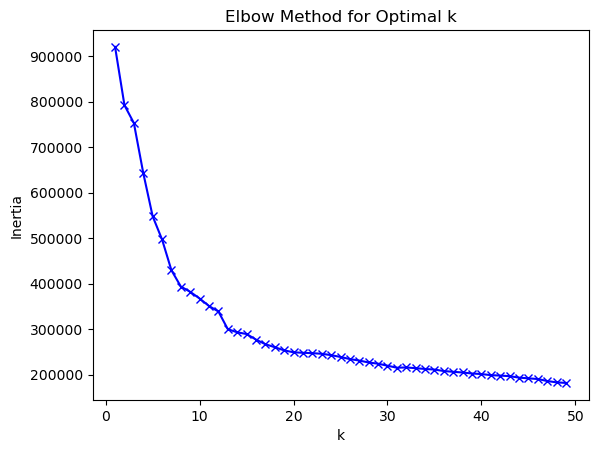

In [9]:
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Redoing the elbow method with less number of iterations so as to get a more precise value for k

In [10]:
inertias = []
distortions = []
k_range = range(1, 25)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

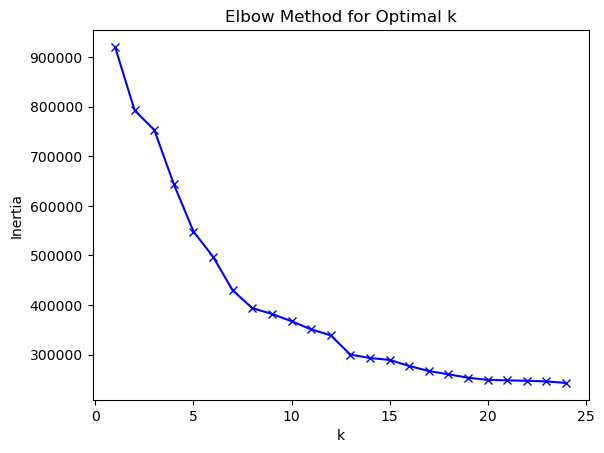

In [11]:
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

From this it can be seen that the elbow that is the value that inertia starts to plateau is right around k=7 to k=13. So I will take the optimal value of k as 10.

In [12]:
# Perform K-means clustering
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [13]:
# Dimensionality reduction
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

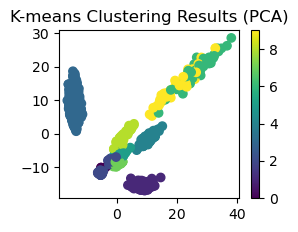

In [14]:
# 1. K-means clustering results (PCA)
plt.subplot(2, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering Results (PCA)')
plt.colorbar(scatter)

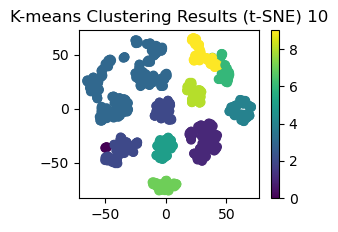

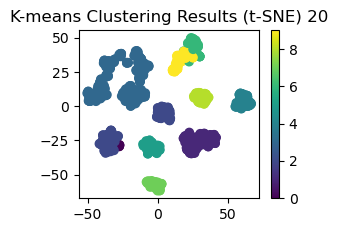

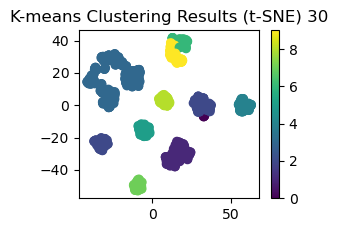

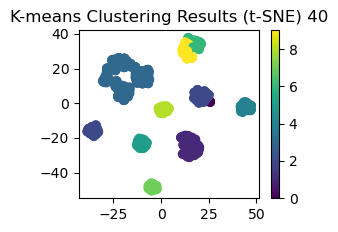

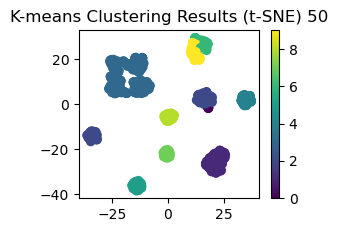

In [15]:
# K-means clustering results (t-SNE)
for i in range(10, 51, 10):
    tsne = TSNE(perplexity=i, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    plt.subplot(2, 2, 1)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
    plt.title('K-means Clustering Results (t-SNE) '+str(i))
    plt.colorbar(scatter)
    plt.show()

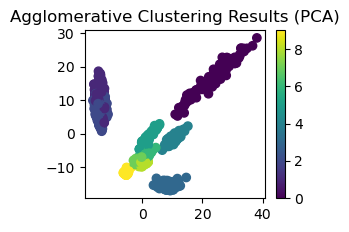

In [16]:
# Perform Agglomerative Clustering and apply PCA
model = AgglomerativeClustering(n_clusters=10)
cluster_labels = model.fit_predict(X_scaled)
model = model.fit(X_scaled)
plt.subplot(2, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering Results (PCA)')
plt.colorbar(scatter)

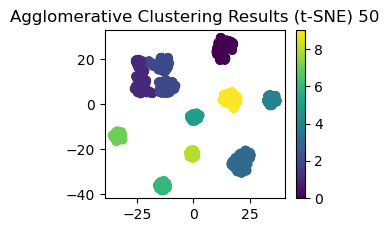

In [17]:
# tsne for Aglomerative Clustering
tsne = TSNE(perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure()
plt.subplot(2, 2, 1)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering Results (t-SNE) '+str(50))
plt.colorbar(scatter)
plt.show()

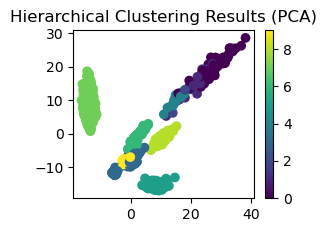

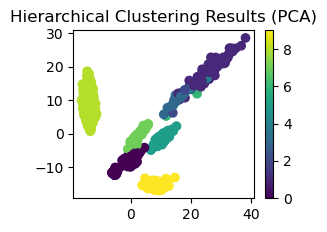

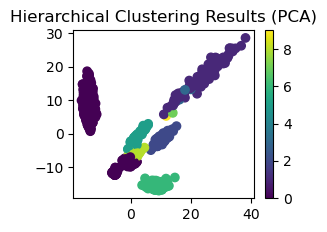

In [18]:
linkages = ['complete', 'average', 'single']
for linkage in linkages:
    model = AgglomerativeClustering(n_clusters=10, linkage = linkage, metric = "manhattan")
    cluster_labels = model.fit_predict(X_scaled)
    plt.subplot(2, 2, 1)
    model = model.fit(X_scaled)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
    plt.title('Hierarchical Clustering Results (PCA)')
    plt.colorbar(scatter)
    plt.show()

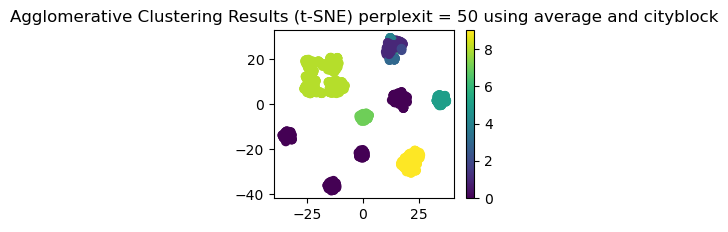

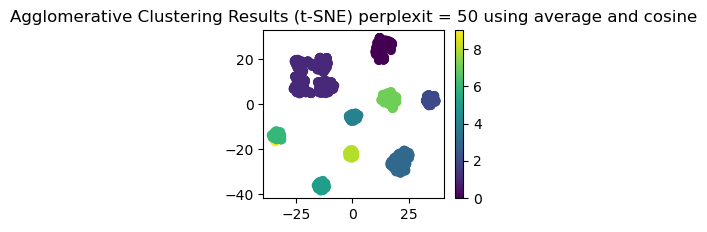

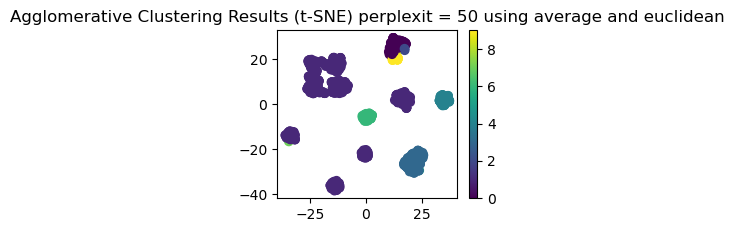

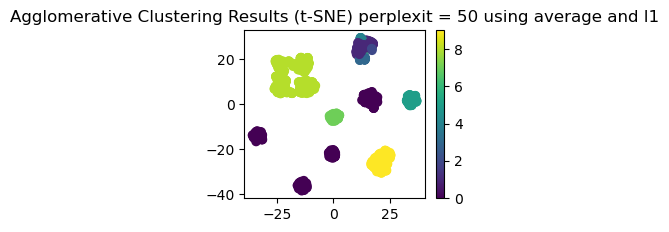

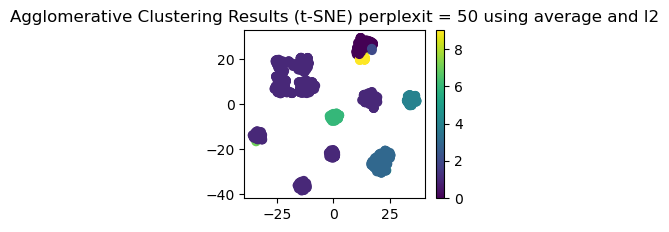

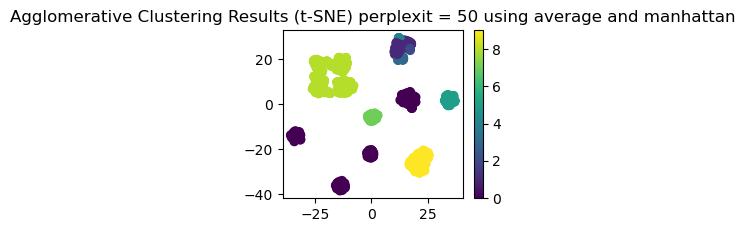

In [19]:
#Agglomerative Clustering using different distance metrics
linkages = ['complete', 'average', 'single']
metrics = ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]
for metric in  metrics:
    model = AgglomerativeClustering(n_clusters=10, linkage = "average", metric = metric)
    cluster_labels = model.fit_predict(X_scaled)
    tsne = TSNE(perplexity=50, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    plt.subplot(2, 2, 1)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
    plt.title('Agglomerative Clustering Results (t-SNE) perplexit = '+str(50)+" using average and "+ metric)
    plt.colorbar(scatter)
    plt.show()

Now let us redo everything dropping all the columns that have got no standard deviation because of the fact that they do not affect the kmeans at all. Apart from making the computation longer.

In [20]:
X = X.drop(only1, axis = 1)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 950 entries, D_1 to D_1023
dtypes: int64(950)
memory usage: 7.0 MB


In [22]:
only1 = []
for k in X.columns:
    if X[k].nunique()==1:
        only1.append(k)

In [23]:
only1

[]

Now there are no columns that have only one unique element

In [24]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
inertias = []
distortions = []
k_range = range(1, 25)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

Text(0.5, 1.0, 'Elbow Method for Optimal k')

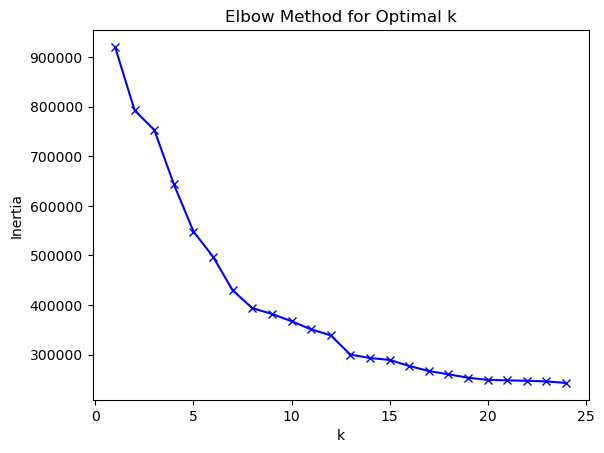

In [26]:
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

In [27]:
# Perform K-means clustering

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [28]:
# Dimensionality reduction
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

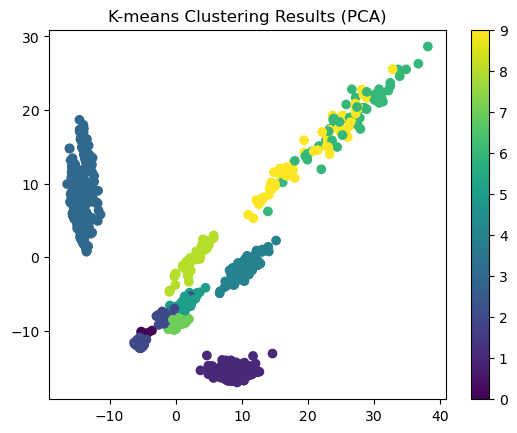

In [29]:
# 1. K-means clustering results (PCA)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering Results (PCA)')
plt.colorbar(scatter)

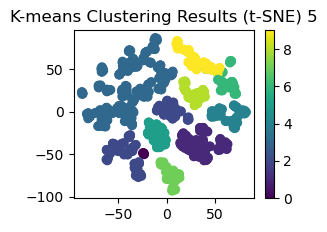

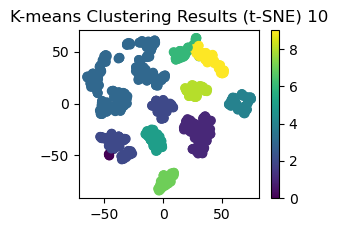

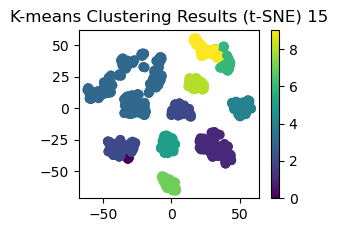

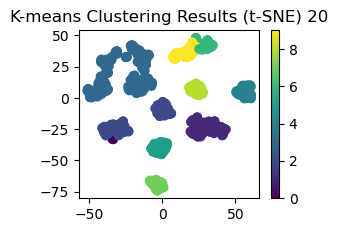

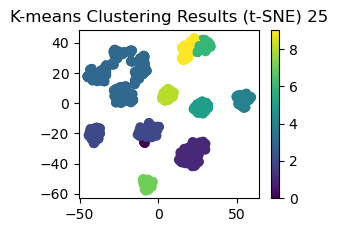

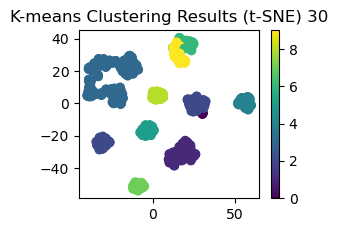

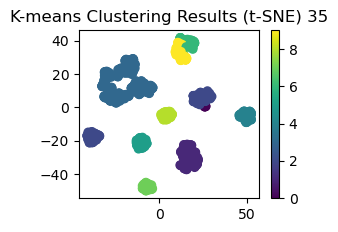

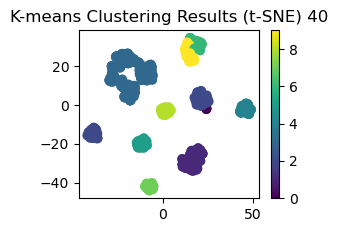

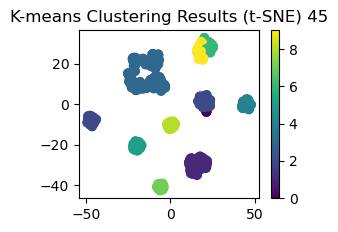

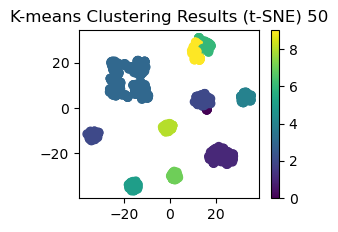

In [30]:
#  K-means clustering results (t-SNE)
for i in range(5, 51, 5):
    tsne = TSNE(perplexity=i, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    plt.figure()
    plt.subplot(2, 2, 1)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
    plt.title('K-means Clustering Results (t-SNE) '+str(i))
    plt.colorbar(scatter)
    plt.show()

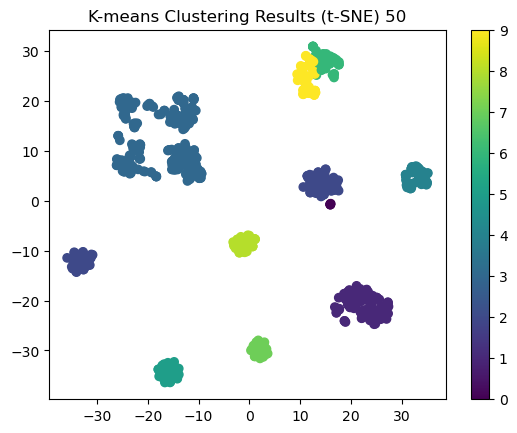

In [31]:
# Kmeans clustering tsne when perpelxity = 50
tsne = TSNE(perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure()
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering Results (t-SNE) '+str(50))
plt.colorbar(scatter)
plt.show()

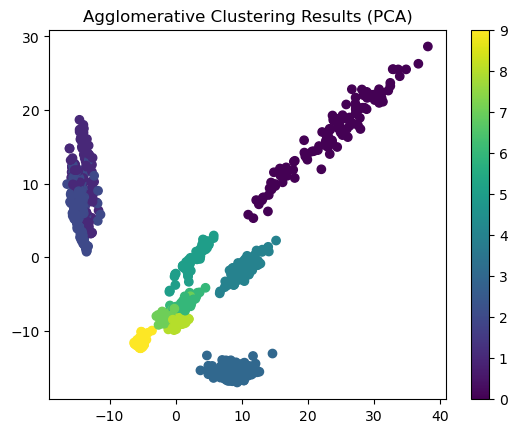

In [32]:
# pca for agglomerative Clustering
model = AgglomerativeClustering(n_clusters=10)
cluster_labels = model.fit_predict(X_scaled)
model = model.fit(X_scaled)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering Results (PCA)')
plt.colorbar(scatter)
plt.show()

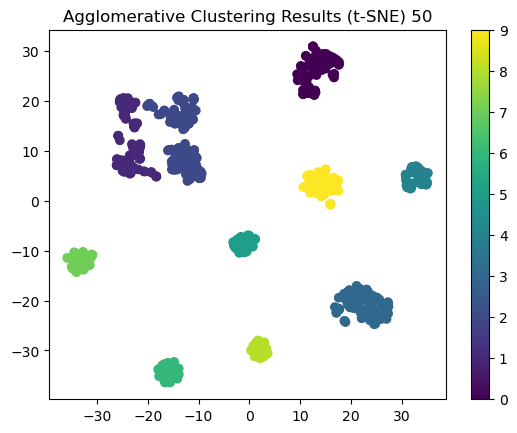

In [33]:
tsne = TSNE(perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering Results (t-SNE) '+str(50))
plt.colorbar(scatter)
plt.show()

In [34]:
metrics = ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]

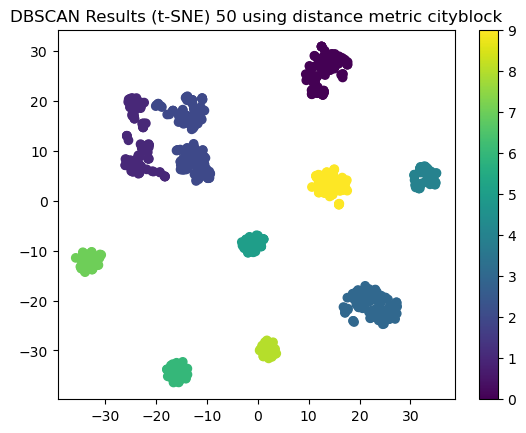

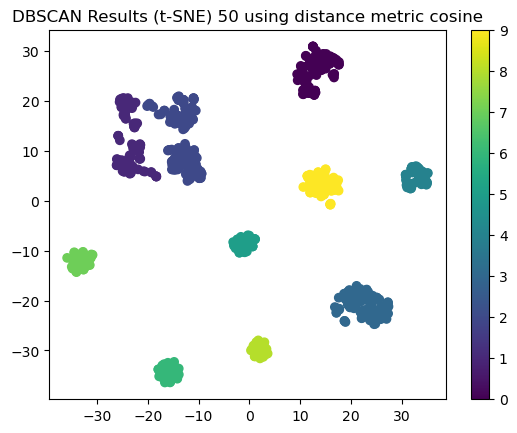

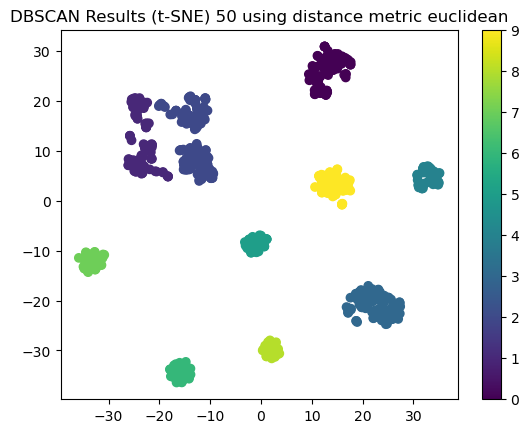

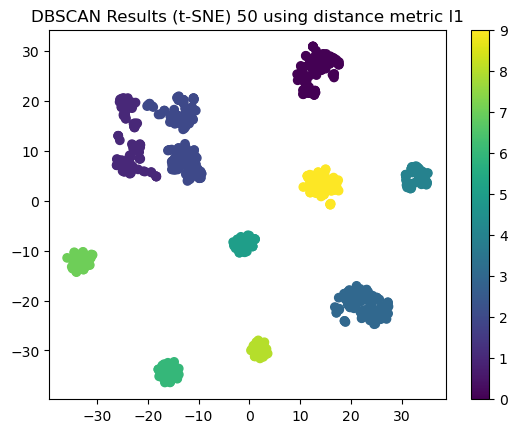

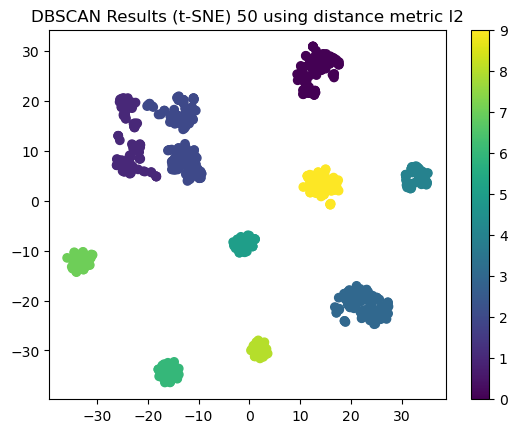

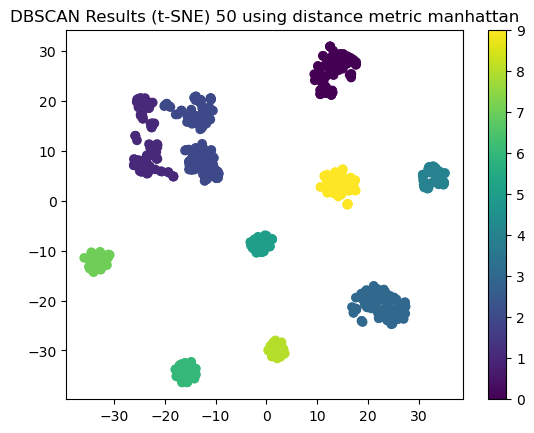

In [35]:
#Using DBSCAN for doing clustering
for i, j  in zip( range(5, 20), metrics):
    model = DBSCAN(min_samples=i, metric = j)
    clustering = model.fit(X_scaled)
    clustering_labels = clustering.labels_
    tsne = TSNE(perplexity=50, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    plt.figure()
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
    plt.title('DBSCAN Results (t-SNE) '+str(50)+" using distance metric "+j)
    plt.colorbar(scatter)
    plt.show()

From doing all of these different clustering techniques I can say that in my opinion there are a few differences between the different clustering techniques and also noticeable differences between the different distance metrics used by the algorithms. In my opinion and from what I can view DBSCAN produces the most consistent output despite the utilisation of different distance metrics whereas agglomerative actually showed visuall difference based on the type of distance metric used. I also believe that despite that finding DBSCAN produces the best clusters. Whereas K-means does not produce great clusters.

I found the distance betweeen each centroid for fun so please excuse this section as this for my own personal knowledge to be able to understand how I could find the distance between centroids for kmeans.  

In [36]:
centroids = []
for i in range(len(kmeans.cluster_centers_)):
    centroids.append(sum(kmeans.cluster_centers_[i])/len(kmeans.cluster_centers_[i]))
centroids = np.array(centroids)

In [37]:
centroids = centroids.reshape(-1,2)
centroids.shape

(5, 2)

In [38]:
centr_pca = PCA(n_components=2)
centr_pca = centr_pca.fit_transform(centroids)
centr_pca

array([[-0.41379726, -0.0765577 ],
       [-0.34971055, -0.16491361],
       [ 0.09860889, -0.10655669],
       [ 0.69966832, -0.09087664],
       [-0.03476941,  0.43890463]])

Text(0.5, 1.0, 'Distance Matrix Heatmap')

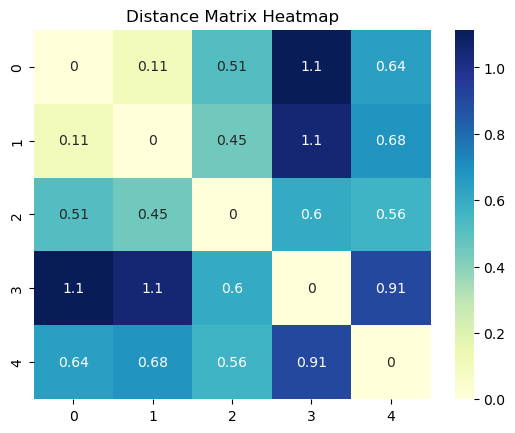

In [39]:
dist_matrix_centr = pdist(centroids)
dist_matrix_square = squareform(dist_matrix_centr)
sns.heatmap(dist_matrix_square, cmap='YlGnBu', annot = True)
plt.title('Distance Matrix Heatmap')